In [1]:
# Module importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from scipy.stats import norm

In [2]:
# Daten in pd einlesen
data = pd.read_excel("llr_LE1_linear_logistic_regression_pseudo.xlsx")
data

,Klasse,Einkommen,Stresslevel
0,1,6731,6
1,0,3746,2
2,1,9131,9
3,1,12617,9
4,0,1640,1
...,...,...,...
2906,0,4235,2
2907,1,10335,10
2908,1,9649,7
2909,0,2554,1


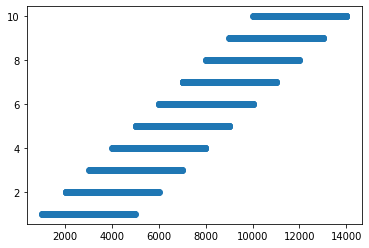

In [3]:
# x und y Werte definieren
x = data["Einkommen"].values.reshape(-1,1)
y = data["Stresslevel"].values

# Scatterplot
plt.scatter(x,y)
plt.show()

In [4]:
# Lineare Regressions Model erstellen
model = LinearRegression().fit(x,y)

In [5]:
# Paramter vom Model
steigung = model.coef_
achsenabschnitt = model.intercept_

print("Stresslevel = ", steigung[0], "* Einkommen + ", achsenabschnitt)

Stresslevel =  0.0008506163331233571 * Einkommen +  -0.8896331613957802


In [6]:
# Bewertung des Models
r2 = model.score(x,y)
print(r2)
# Starke Korrelation!

0.8606080346678251


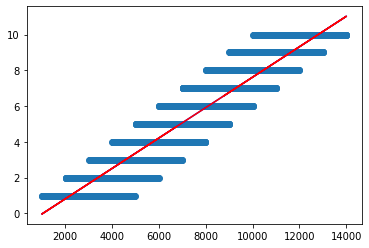

In [7]:
# Scatterplot mit Model
plt.scatter(x,y)
plt.plot(x, steigung * x + achsenabschnitt , c = "b")
plt.plot(x, model.predict(x), c = "r")
plt.show()

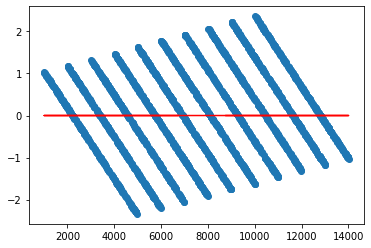

In [8]:
# Residuenanalyse
y_predict = model.predict(x)
residuen = y - y_predict

plt.scatter(x, residuen)
plt.plot(x, x * 0, c = "r")
plt.show()

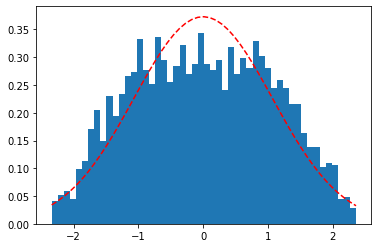

In [13]:
n, bins, patches = plt.hist(residuen, 50, stacked = True, density = True)

mue = np.mean(residuen)
sigma = np.std(residuen)

y = norm.pdf(bins, mue, sigma)
plt.plot(bins, y, "r--")
plt.show()